In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('SuperStoreOrders (1).csv')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [4]:
df.shape

(51290, 21)

In [5]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740,26.375915,2012.777208
std,2.278766,0.212280,174.424113,57.296804,1.098931
min,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,5.000000,0.200000,36.810000,24.450000,2014.000000
max,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [8]:
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=True, errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], format='mixed', dayfirst=True, errors='coerce')
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [9]:
df['shipping_delay'] = (df['ship_date'] - df['order_date']).dt.days

In [10]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,shipping_delay
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011,5
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011,7
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011,4
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011,4
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014,4
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014,5
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014,2
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014,6


In [11]:
df['sales'] = df['sales'].replace(',', '', regex=True).astype(int)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,shipping_delay
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011,5
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011,7
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011,4
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011,4
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014,4
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014,5
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014,2
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014,6


In [12]:
df['profit_margin'] = (df['profit'] / df['sales'])
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,shipping_delay,profit_margin
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011,5,0.260147
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011,7,0.300300
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011,4,0.449091
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011,4,-0.579000
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011,7,0.331316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014,4,0.322771
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014,5,0.105000
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014,2,0.475385
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014,6,0.080000


In [13]:
df.describe()
df.groupby('category')[['sales','profit']].sum()
df.groupby('segment')[['sales','profit']].sum()

,sales,profit
segment,,
Consumer,6508141,749239.78206
Corporate,3824808,442785.85866
Home Office,2309956,277009.18056


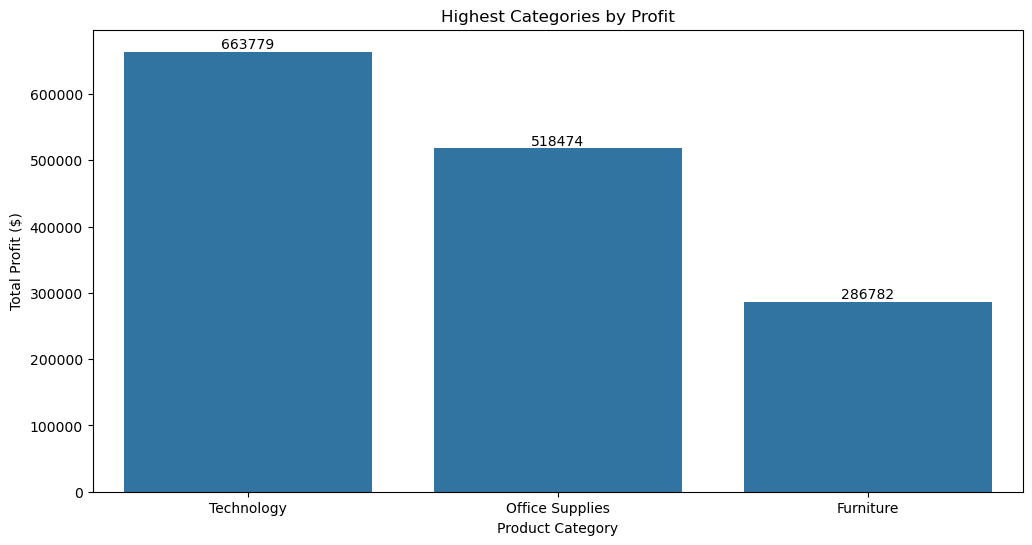

In [14]:
category = df.groupby('category', as_index=False)['profit'].sum()

sort = category.sort_values('profit', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sort, x = 'category', y = 'profit')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')
plt.title('Highest Categories by Profit')
plt.xlabel('Product Category')
plt.ylabel('Total Profit ($)')
plt.show()

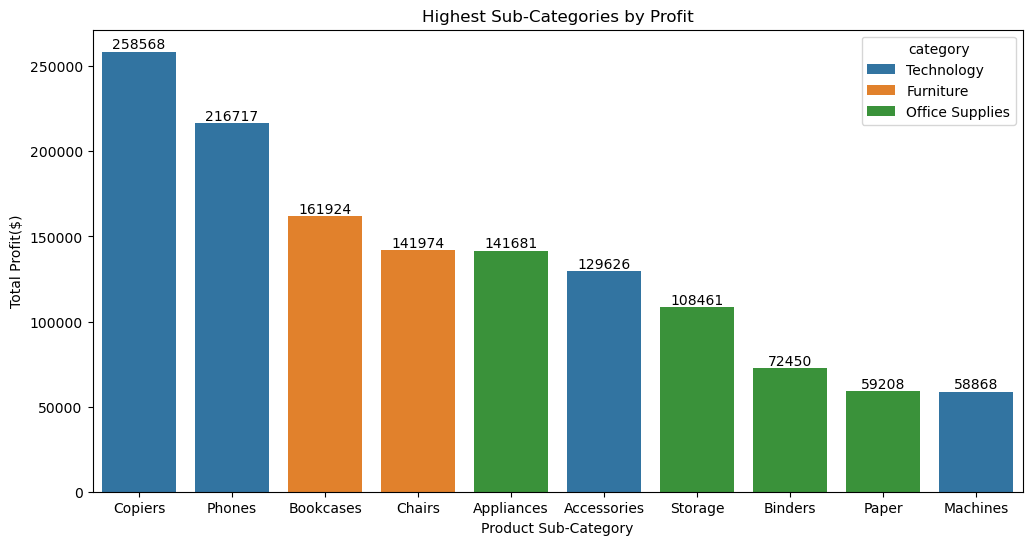

In [15]:
sub = df.groupby(['sub_category', 'category'], as_index=False)['profit'].sum()

sort = sub.sort_values('profit', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data = sort, x = 'sub_category', y = 'profit', hue = 'category')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Highest Sub-Categories by Profit')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Profit($)')
plt.show()

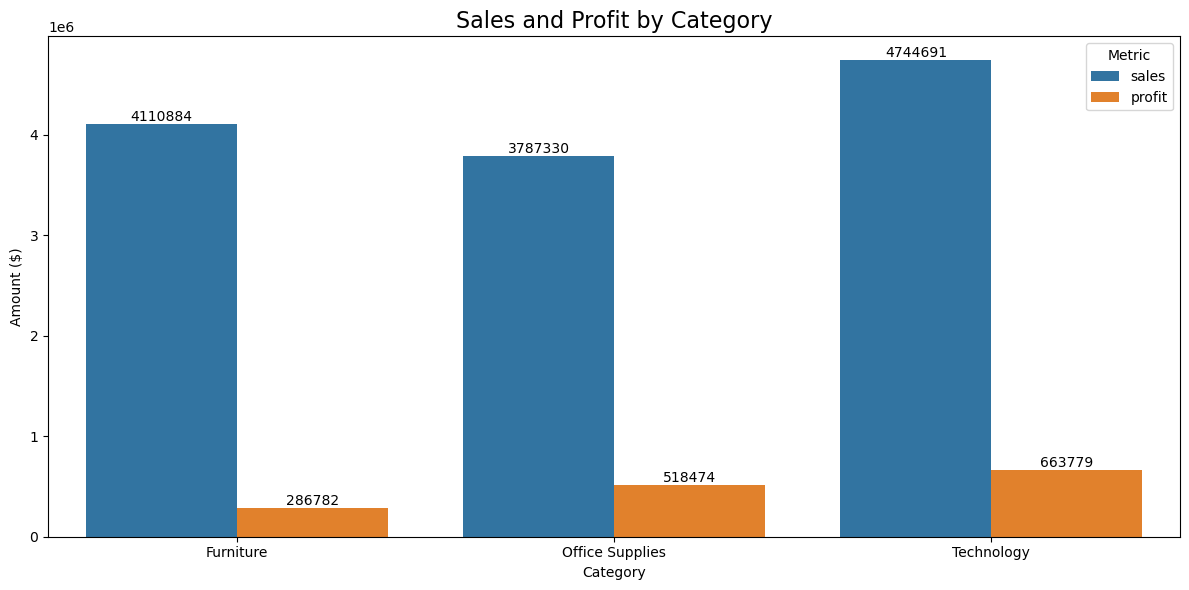

In [16]:
category_summary = df.groupby('category', as_index=False)[['sales', 'profit']].sum()

category_melted = category_summary.melt(id_vars='category', value_vars=['sales', 'profit'], var_name='Metric', value_name='Amount')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=category_melted, x='category', y='Amount', hue='Metric')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Sales and Profit by Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()

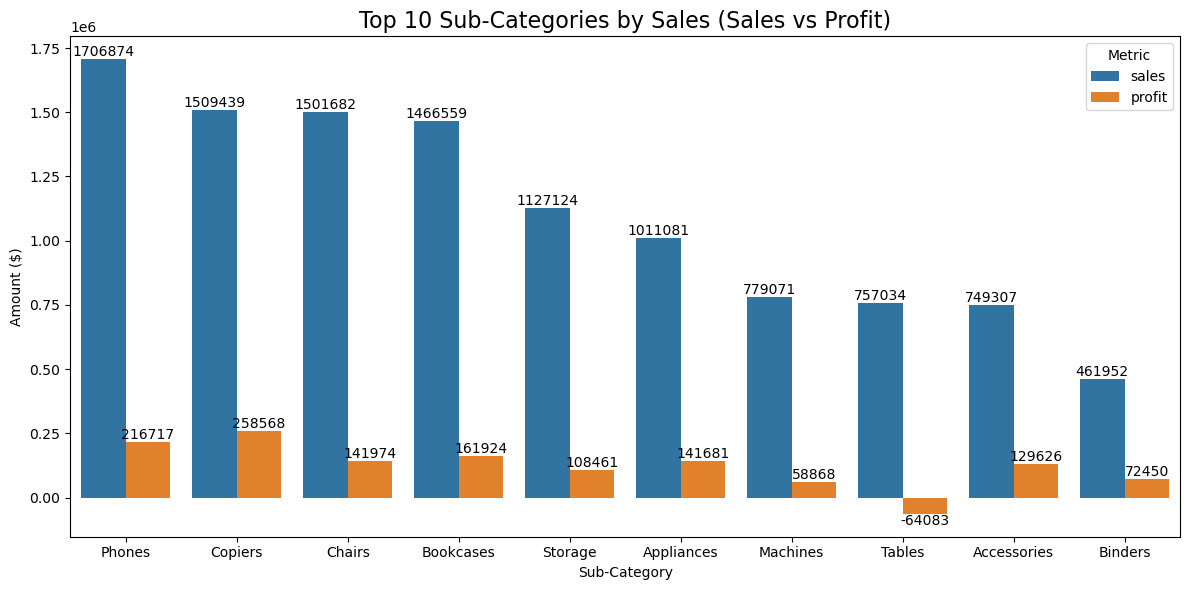

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sub = df.groupby(['sub_category', 'category'], as_index=False)[['sales', 'profit']].sum()
sort = sub.sort_values('sales', ascending=False).head(10)

melted = sort.melt(id_vars=['sub_category', 'category'], value_vars=['sales', 'profit'], var_name='Metric', value_name='amount')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=melted, x='sub_category', y='amount', hue='Metric')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Top 10 Sub-Categories by Sales (Sales vs Profit)', fontsize=16)
plt.xlabel('Sub-Category')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()

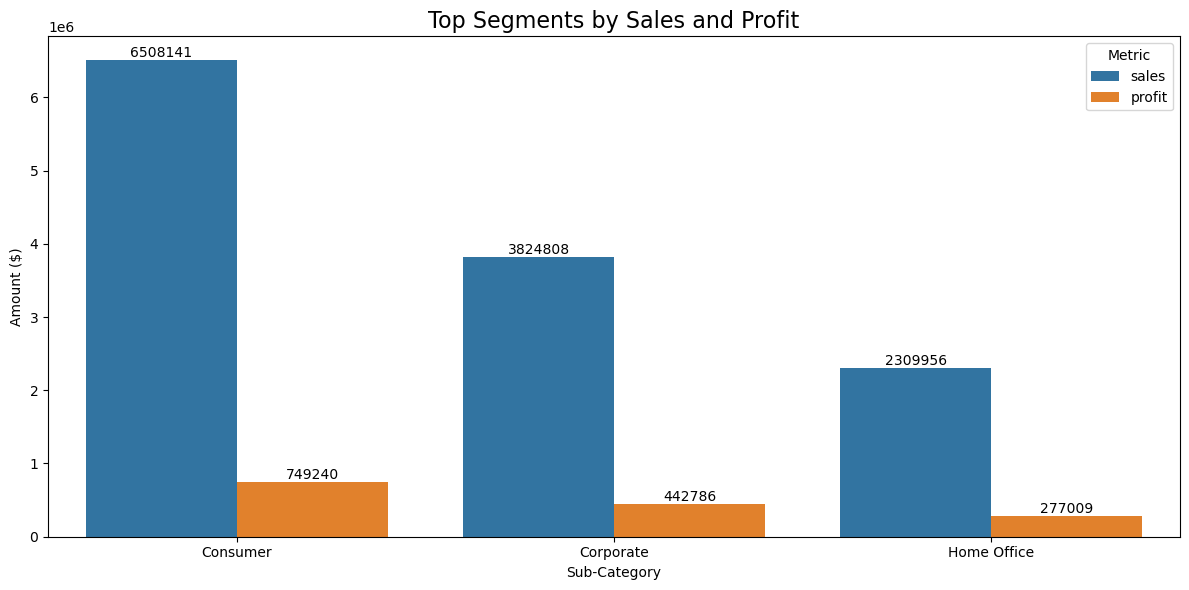

In [18]:
sub = df.groupby('segment', as_index=False)[['sales', 'profit']].sum()
sort = sub.sort_values('sales', ascending=False).head(10)

melted = sort.melt(id_vars='segment', value_vars=['sales', 'profit'], var_name='Metric', value_name='amount')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=melted, x='segment', y='amount', hue='Metric')

for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Top Segments by Sales and Profit', fontsize=16)
plt.xlabel('Sub-Category')
plt.ylabel('Amount ($)')
plt.tight_layout()
plt.show()

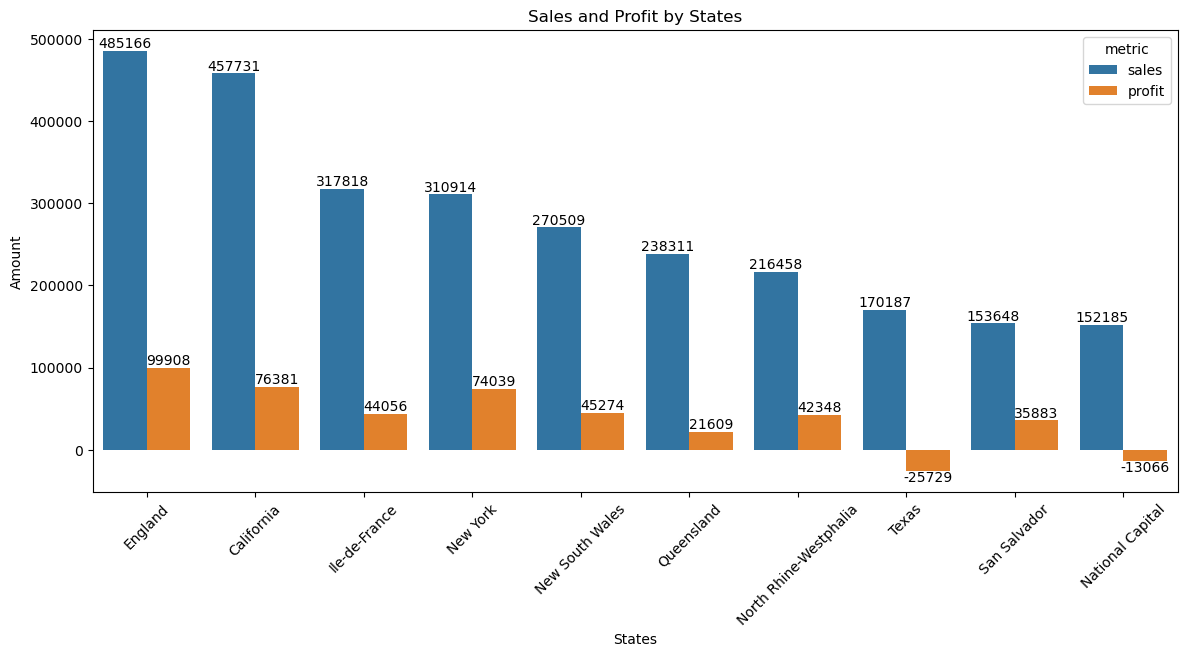

In [19]:
states = df.groupby('state', as_index=False)[['sales', 'profit']].sum()
sort = states.sort_values('sales', ascending=False).head(10)

melted = sort.melt(id_vars='state', value_vars=['sales', 'profit'], var_name='metric', value_name='amount')

plt.figure(figsize=(14,6))
ax = sns.barplot(data = melted, x = 'state', y = 'amount', hue = 'metric')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Sales and Profit by States')
plt.xticks(rotation=45)
plt.xlabel('States')
plt.ylabel('Amount')
plt.show()

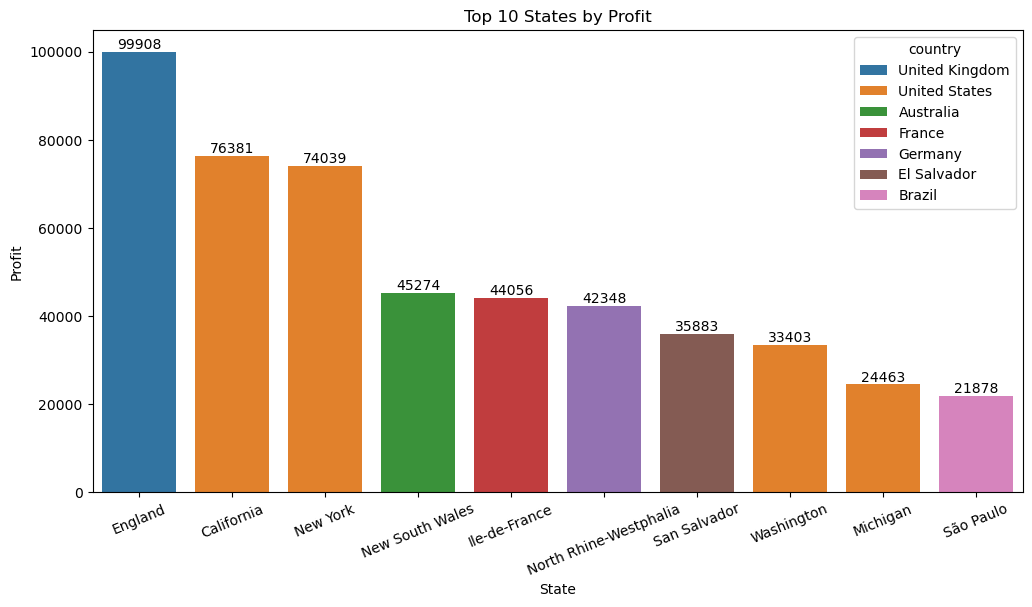

In [20]:
state = df.groupby(['state', 'country'], as_index=False)['profit'].sum()
sort = state.sort_values('profit', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=sort, x = 'state', y = 'profit', hue = 'country')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Top 10 States by Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=22.5)
plt.show()

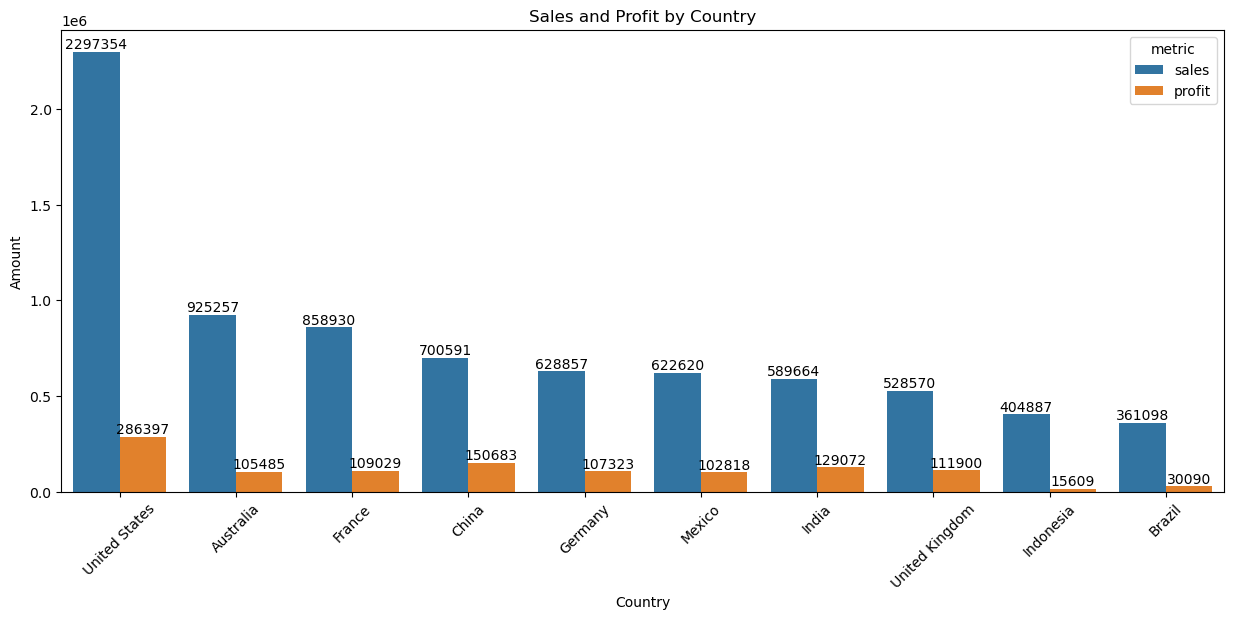

In [21]:
country = df.groupby('country', as_index=False)[['sales', 'profit']].sum()
sort = country.sort_values('sales', ascending=False).head(10)

melted = sort.melt(id_vars='country', value_vars=['sales', 'profit'], var_name='metric', value_name='amount')

plt.figure(figsize=(15,6))
ax = sns.barplot(data = melted, x = 'country', y = 'amount', hue = 'metric')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Sales and Profit by Country')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Amount')
plt.show()

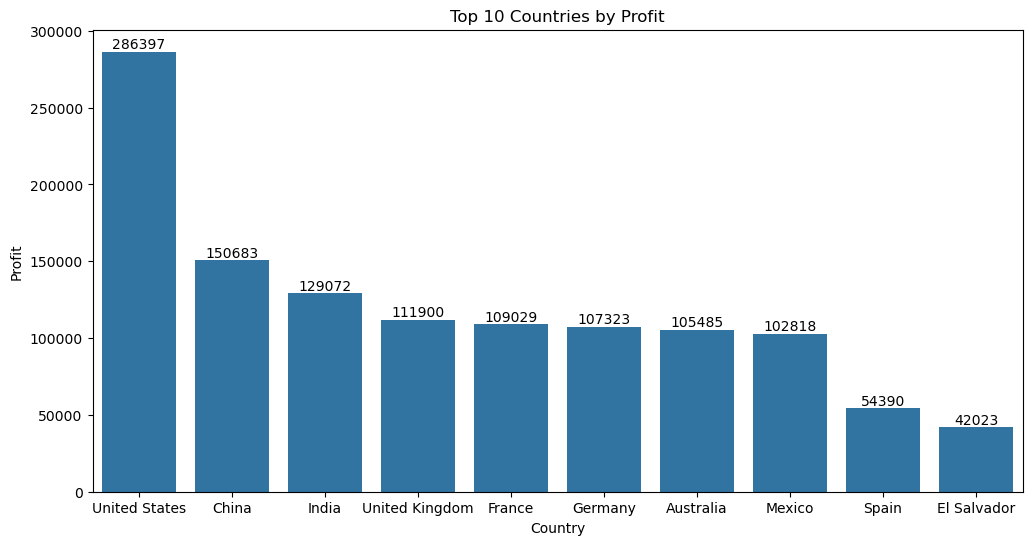

In [22]:
country = df.groupby('country', as_index=False)['profit'].sum()
sort = country.sort_values('profit', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=sort, x = 'country', y = 'profit')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Top 10 Countries by Profit')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.show()

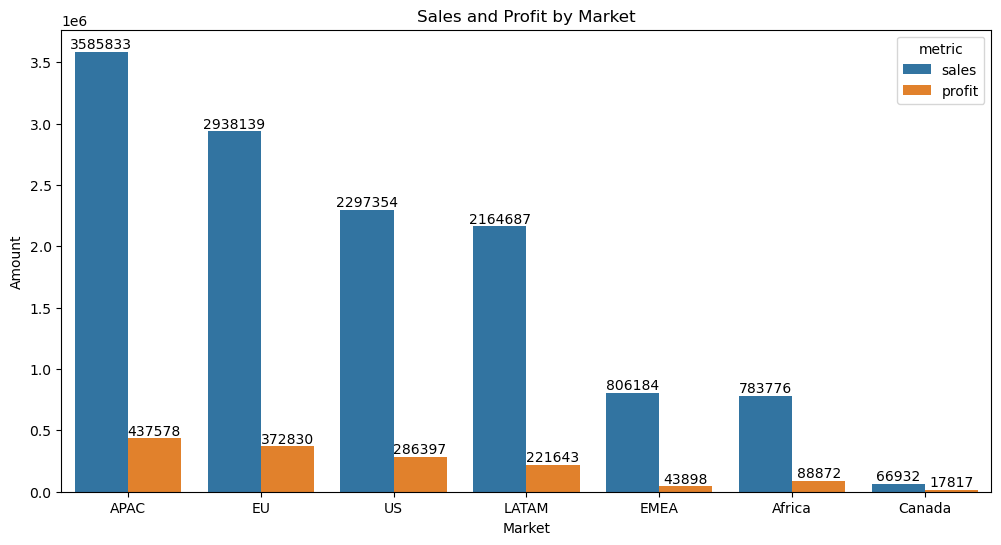

In [23]:
market = df.groupby('market', as_index=False)[['sales', 'profit']].sum()
sort = market.sort_values('sales', ascending=False)

melted = sort.melt(id_vars='market', value_vars=['sales', 'profit'], var_name='metric', value_name='amount')

plt.figure(figsize=(12,6))
ax = sns.barplot(data = melted, x = 'market', y = 'amount', hue = 'metric')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Sales and Profit by Market')
plt.xlabel('Market')
plt.ylabel('Amount')
plt.show()

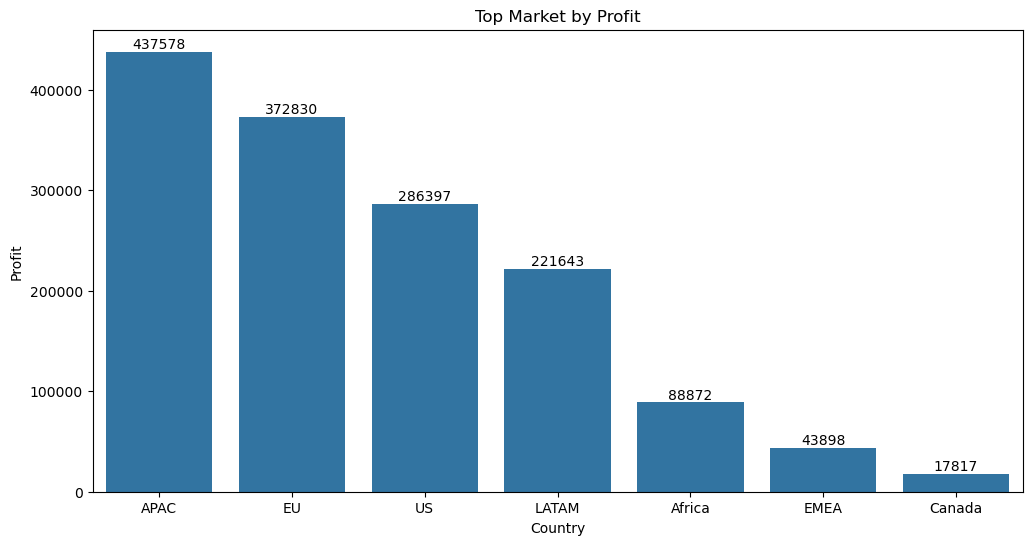

In [24]:
market = df.groupby('market', as_index=False)['profit'].sum()
sort = market.sort_values('profit', ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=sort, x = 'market', y = 'profit')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Top Market by Profit')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.show()

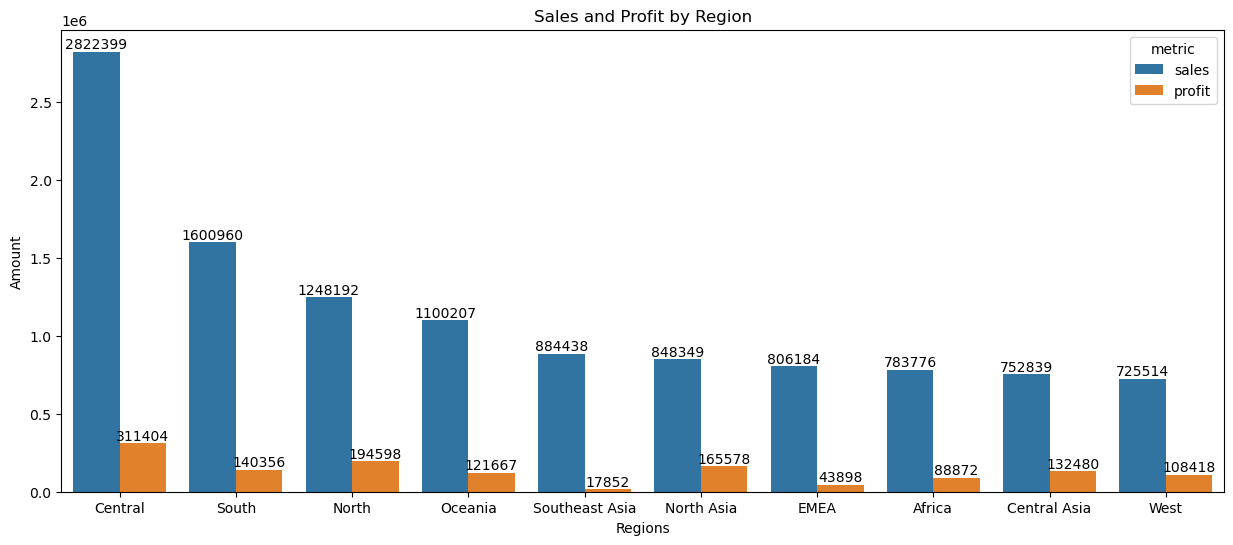

In [25]:
region = df.groupby('region', as_index=False)[['sales', 'profit']].sum()
sort = region.sort_values('sales', ascending=False).head(10)

melted = sort.melt(id_vars='region', value_vars=['sales', 'profit'], var_name='metric', value_name='amount')

plt.figure(figsize=(15,6))
ax = sns.barplot(data = melted, x = 'region', y = 'amount', hue = 'metric')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Sales and Profit by Region')
plt.xlabel('Regions')
plt.ylabel('Amount')
plt.show()

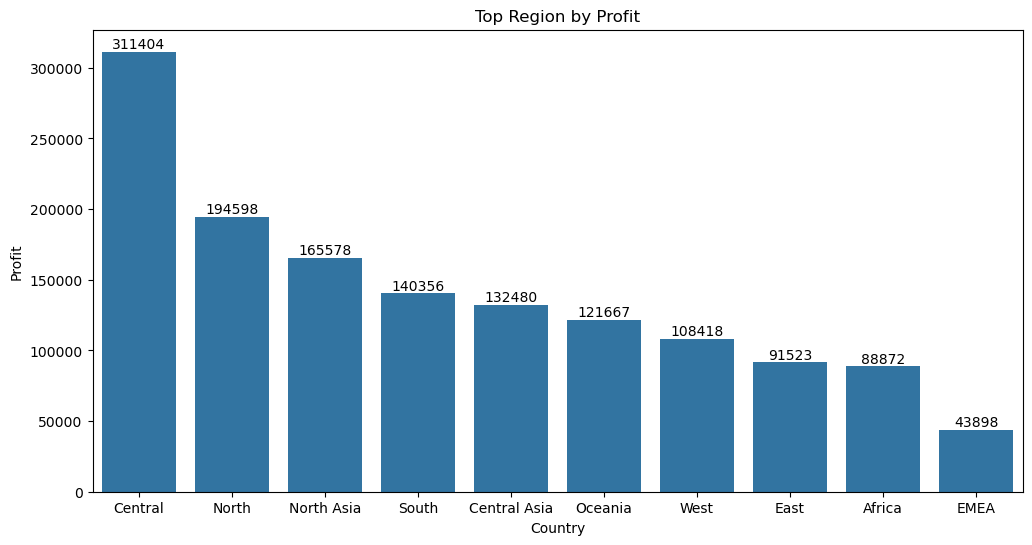

In [26]:
region = df.groupby('region', as_index=False)['profit'].sum()
sort = region.sort_values('profit', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data=sort, x = 'region', y = 'profit')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Top Region by Profit')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.show()

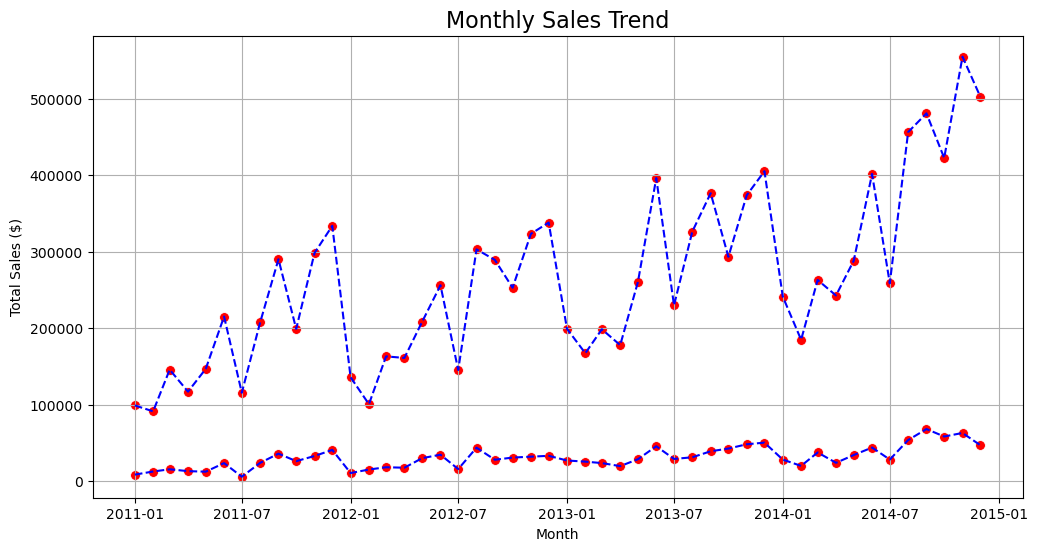

In [27]:
df['order_date'] = pd.to_datetime(df['order_date'])

sale = df.groupby(df['order_date'].dt.to_period('M'))[['sales', 'profit']].sum().reset_index()

sale['order_date'] = sale['order_date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.scatterplot(data=sale, x = 'order_date', y = 'sales', color='red', s=50)
sns.lineplot(data=sale, x='order_date', y='sales', color='blue', linestyle = '--')
sns.scatterplot(data=sale, x = 'order_date', y = 'profit', color='red', s=50)
sns.lineplot(data=sale, x='order_date', y='profit', color='blue', linestyle = '--')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

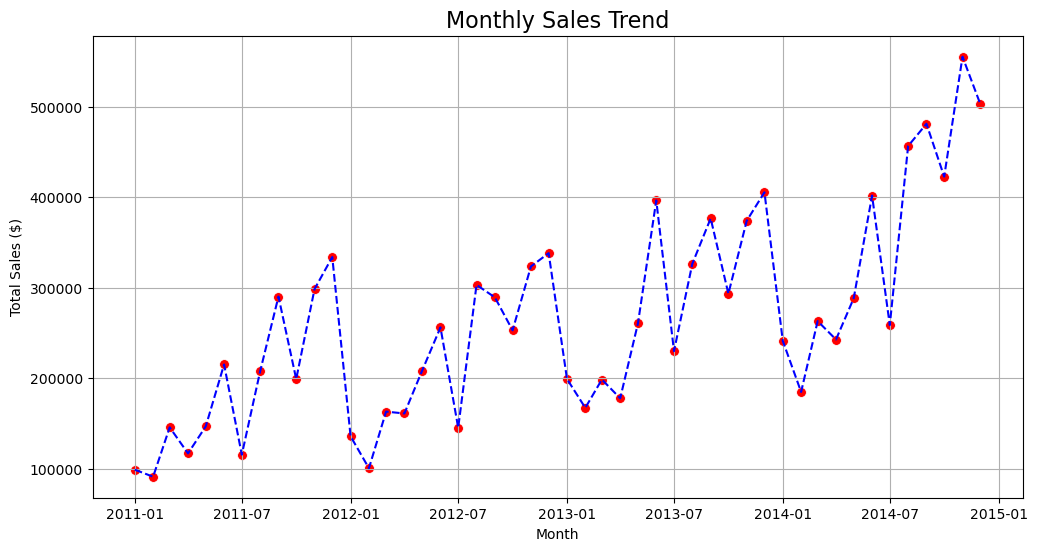

In [28]:
df['order_date'] = pd.to_datetime(df['order_date'])

sale = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum().reset_index()

sale['order_date'] = sale['order_date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.scatterplot(data=sale, x = 'order_date', y = 'sales', color='red', s=50)
sns.lineplot(data=sale, x='order_date', y='sales', color='blue', linestyle = '--')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

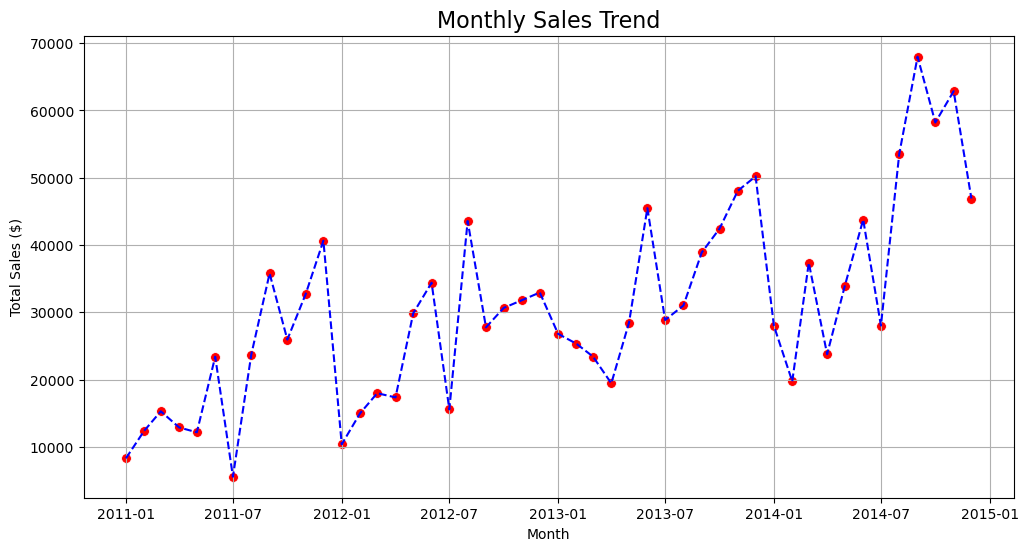

In [29]:
df['order_date'] = pd.to_datetime(df['order_date'])

sale = df.groupby(df['order_date'].dt.to_period('M'))[ 'profit'].sum().reset_index()

sale['order_date'] = sale['order_date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.scatterplot(data=sale, x = 'order_date', y = 'profit', color='red', s=50)
sns.lineplot(data=sale, x='order_date', y='profit', color='blue', linestyle = '--')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

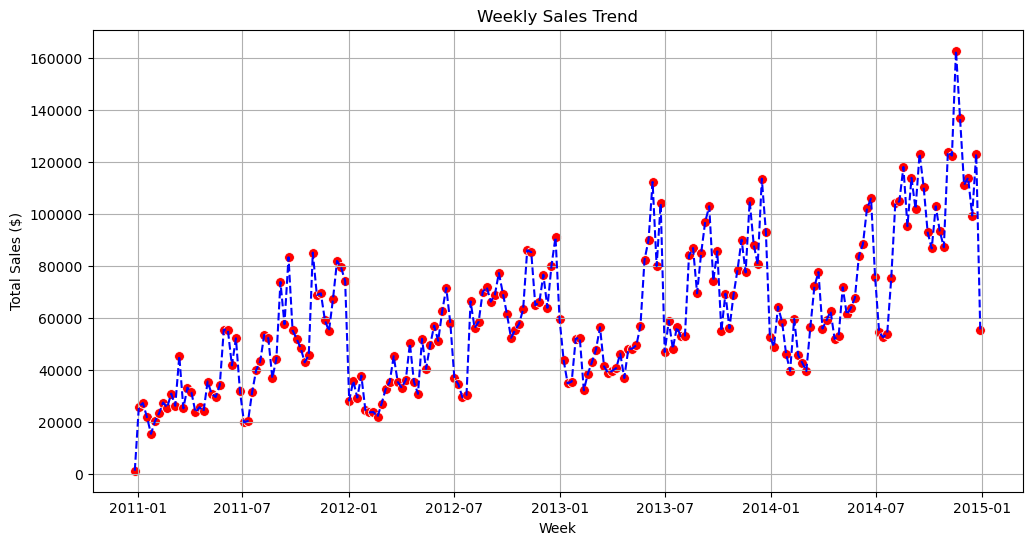

In [30]:
df['order_date'] = pd.to_datetime(df['order_date'])

sale = df.groupby(df['order_date'].dt.to_period('W'))['sales'].sum().reset_index()

sale['order_date'] = sale['order_date'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.scatterplot(data=sale, x = 'order_date', y = 'sales', color='red', s=50)
sns.lineplot(data=sale, x='order_date', y='sales', color='blue', linestyle = '--')
plt.title('Weekly Sales Trend')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

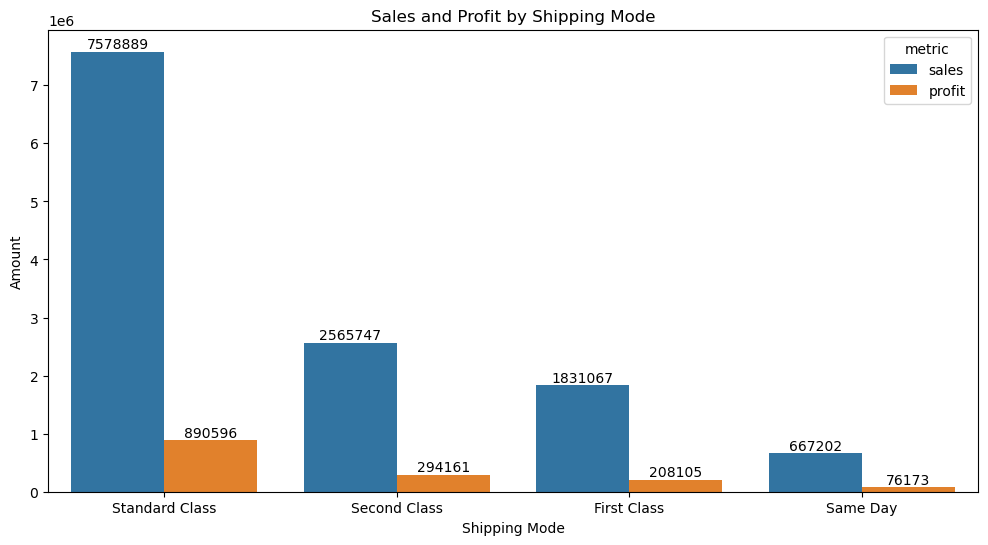

In [31]:
ship = df.groupby('ship_mode', as_index=False)[['sales', 'profit']].sum()
sort = ship.sort_values('sales', ascending=False)

melted = sort.melt(id_vars='ship_mode', value_vars=['sales', 'profit'], var_name='metric', value_name='amount')

plt.figure(figsize=(12,6))
ax = sns.barplot(data=melted, x = 'ship_mode', y = 'amount', hue = 'metric')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Sales and Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Amount')
plt.show()

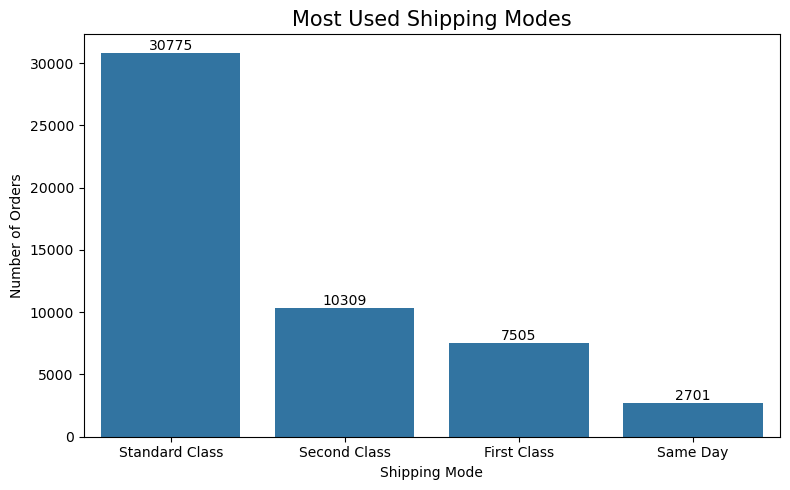

In [32]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='ship_mode', order=df['ship_mode'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Most Used Shipping Modes', fontsize=15)
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Profit Margin')

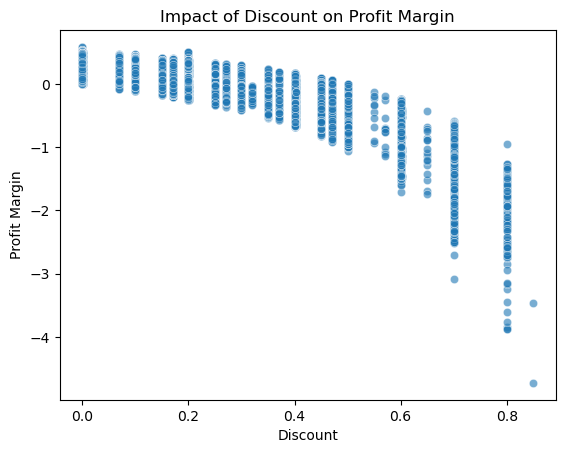

In [33]:
df['profit_margin'] = df['profit'] / df['sales']
sns.scatterplot(data=df, x='discount', y='profit_margin', alpha=0.6)
plt.title('Impact of Discount on Profit Margin')
plt.xlabel('Discount')
plt.ylabel('Profit Margin')

/tmp/ipykernel_25817/2450073400.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['discount'], bins=np.arange(0,1.1,0.1)))['profit_margin'].mean().plot(kind='bar')


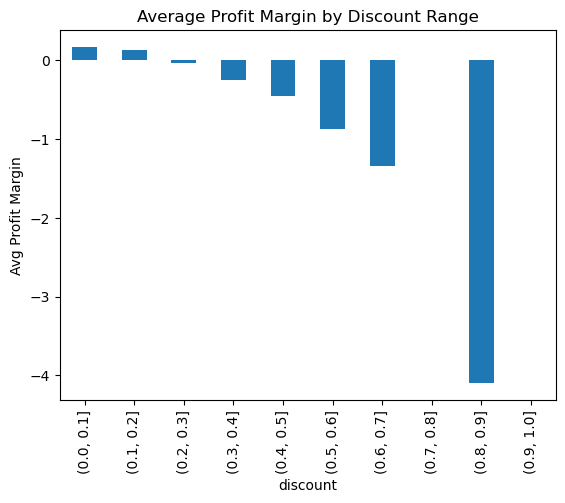

In [34]:
df.groupby(pd.cut(df['discount'], bins=np.arange(0,1.1,0.1)))['profit_margin'].mean().plot(kind='bar')
plt.title('Average Profit Margin by Discount Range')
plt.ylabel('Avg Profit Margin')
plt.show()

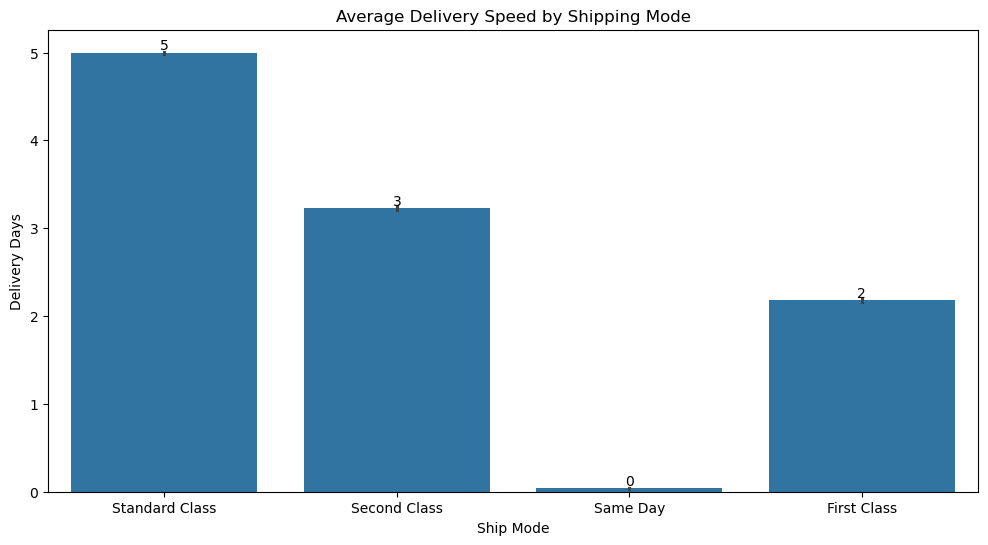

In [35]:
df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days

plt.figure(figsize=(12,6))
ax = sns.barplot(data=df, x='ship_mode', y='delivery_days')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')
    
plt.title('Average Delivery Speed by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Delivery Days')
plt.show()

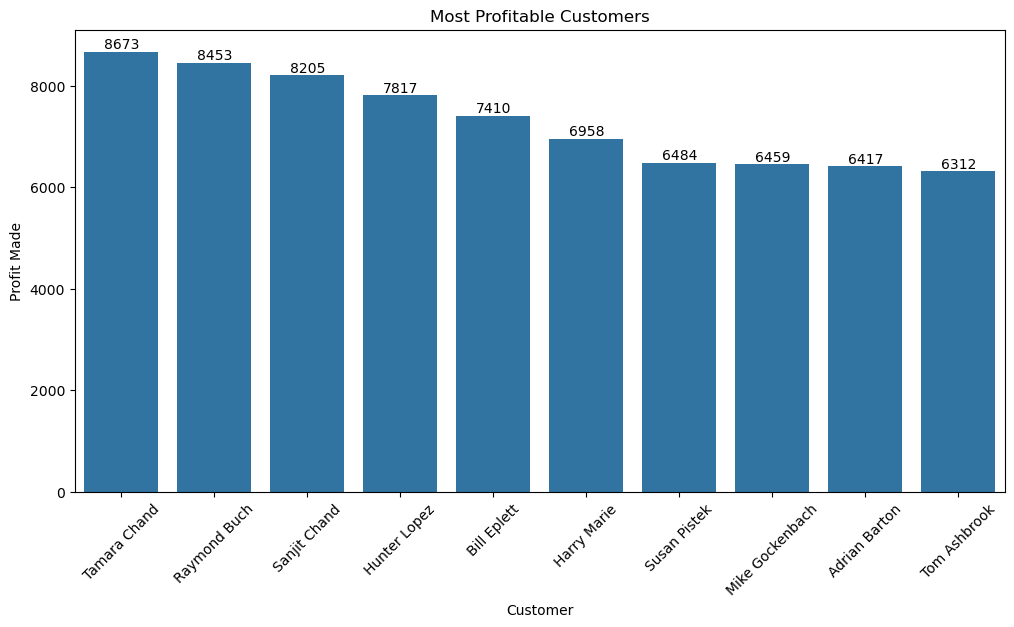

In [36]:
customer = df.groupby('customer_name', as_index=False)['profit'].sum()
sort = customer.sort_values('profit', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(data = sort, x = 'customer_name', y = 'profit')
for container in ax.containers:
    ax.bar_label(container, fmt='%1.0f', label_type='edge', color='black')

plt.title('Most Profitable Customers')
plt.xticks(rotation=45)
plt.xlabel('Customer')
plt.ylabel('Profit Made')
plt.show()

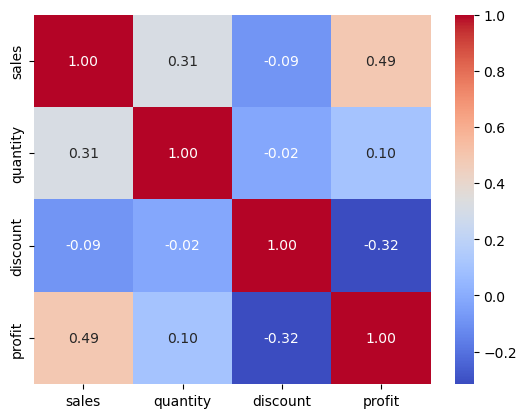

In [37]:
corr = df[['sales', 'quantity', 'discount', 'profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [76]:
features = ['sales', 'discount', 'quantity', 'category', 'sub_category', 'region', 'ship_mode', 'segment', 'market', 'shipping_cost']
target = 'profit'

X = df[features]
y = df[target]

In [77]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

In [78]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50, random_state=42))
])

model.fit(X_train, y_train)

/home/kudu/anaconda3/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['category', 'sub_category', 'region', 'ship_mode', 'segment', 'market'], dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(n_estimators=50, random_state=42))])

In [42]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.6971950123837986
MAE: 35.881643364270396


In [43]:
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
importances = model.named_steps['regressor'].feature_importances_

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

feature_importance.head(10)

,Feature,Importance
47,remainder__sales,0.507854
48,remainder__discount,0.311778
50,remainder__shipping_cost,0.046343
49,remainder__quantity,0.022666
38,cat__segment_Corporate,0.008618
6,cat__sub_category_Binders,0.006107
30,cat__region_South,0.005061
9,cat__sub_category_Copiers,0.004755
18,cat__sub_category_Supplies,0.004566
23,cat__region_Central,0.004423


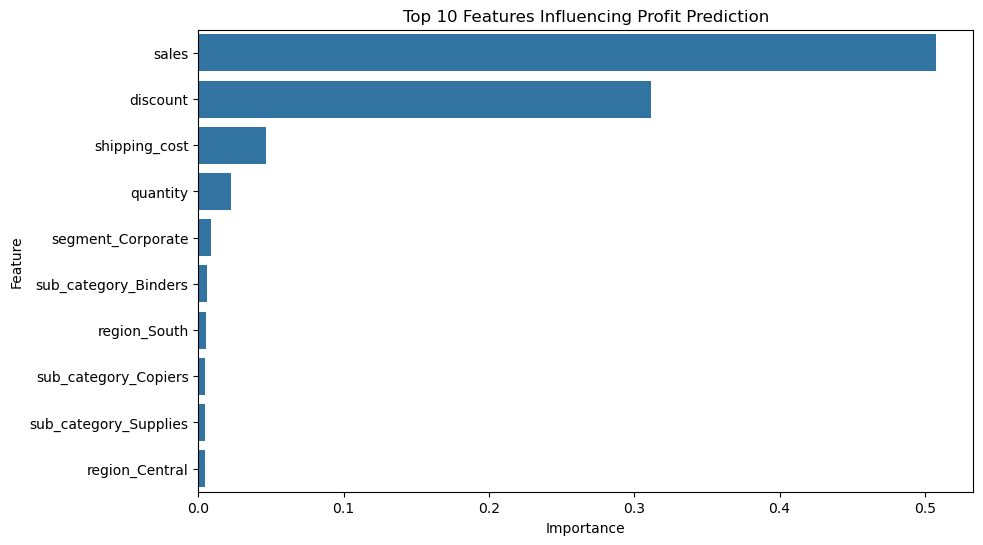

In [44]:
feature_importance['Feature'] = feature_importance['Feature'].str.replace('remainder__','').str.replace('cat__','')
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Features Influencing Profit Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [45]:
pred_df = pd.DataFrame({
    'Actual Profit': y_test.values,
    'Predicted Profit': y_pred
})

pred_df.head(30)

,Actual Profit,Predicted Profit
0,-20.6850,-62.990856
1,-0.4080,1.944660
2,9.7200,6.397000
3,-64.1400,-53.860896
4,560.7882,268.393180
5,34.2600,44.983400
6,4.4088,3.948864
7,381.2375,371.134950
8,2.8200,1.462000
9,12.0000,14.878400


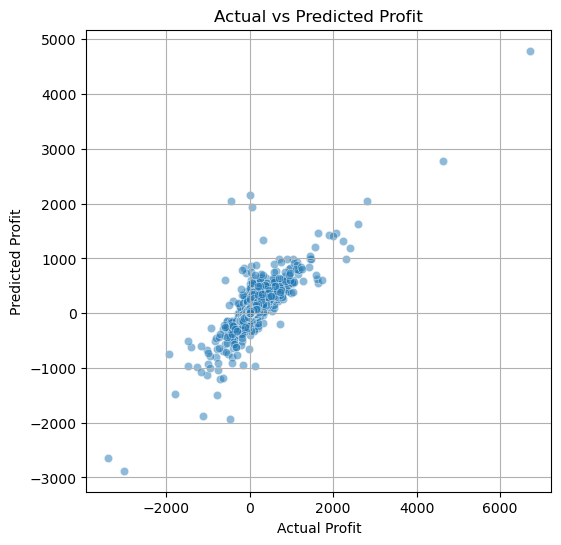

In [58]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.grid(True)
plt.show()